In [6]:
# imports

import torch
from IPython.display import Image

# Calculating gradients in PyTorch

In [10]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([-0.0539,  0.1652, -1.9143], requires_grad=True)


In [11]:
y = x + 2

This will create a computational graph which looks like this:

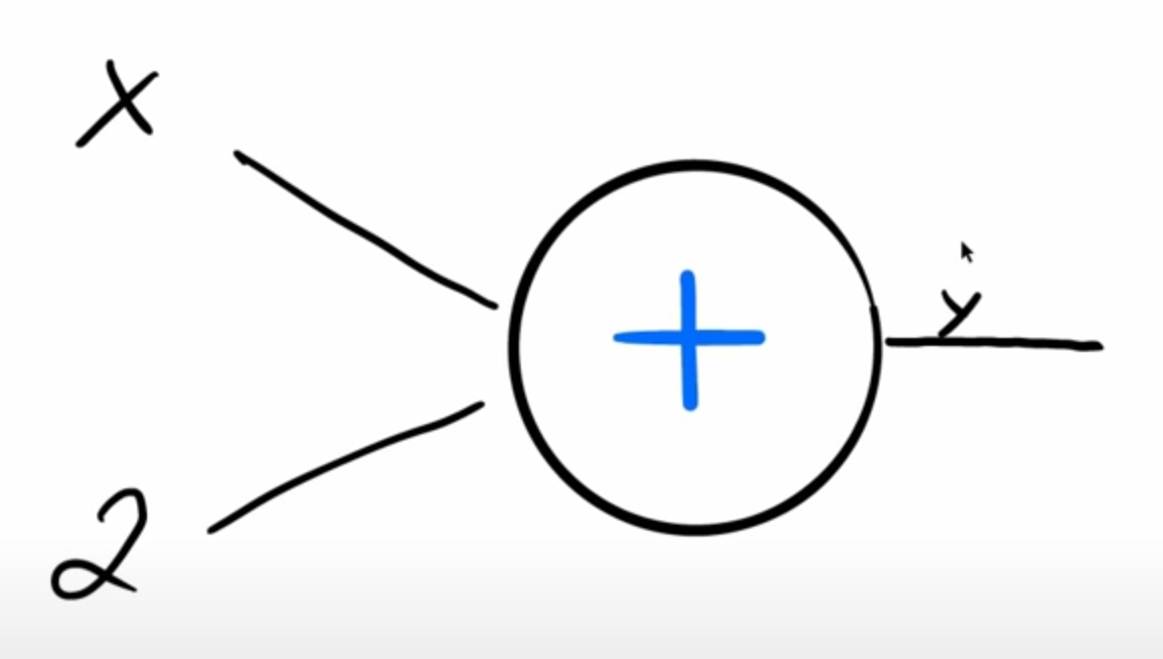

In [12]:
image_path = 'data/grad_1.png'
Image(filename=image_path)

For each operation we have a note with inputs and an output. Here the operation is addition (+), inputs are x and 2, 
output is y. Using method called backpropagation we ca calculate the gradients. Simple explanation of the usage of 
the algorithm introduced on the picture below:

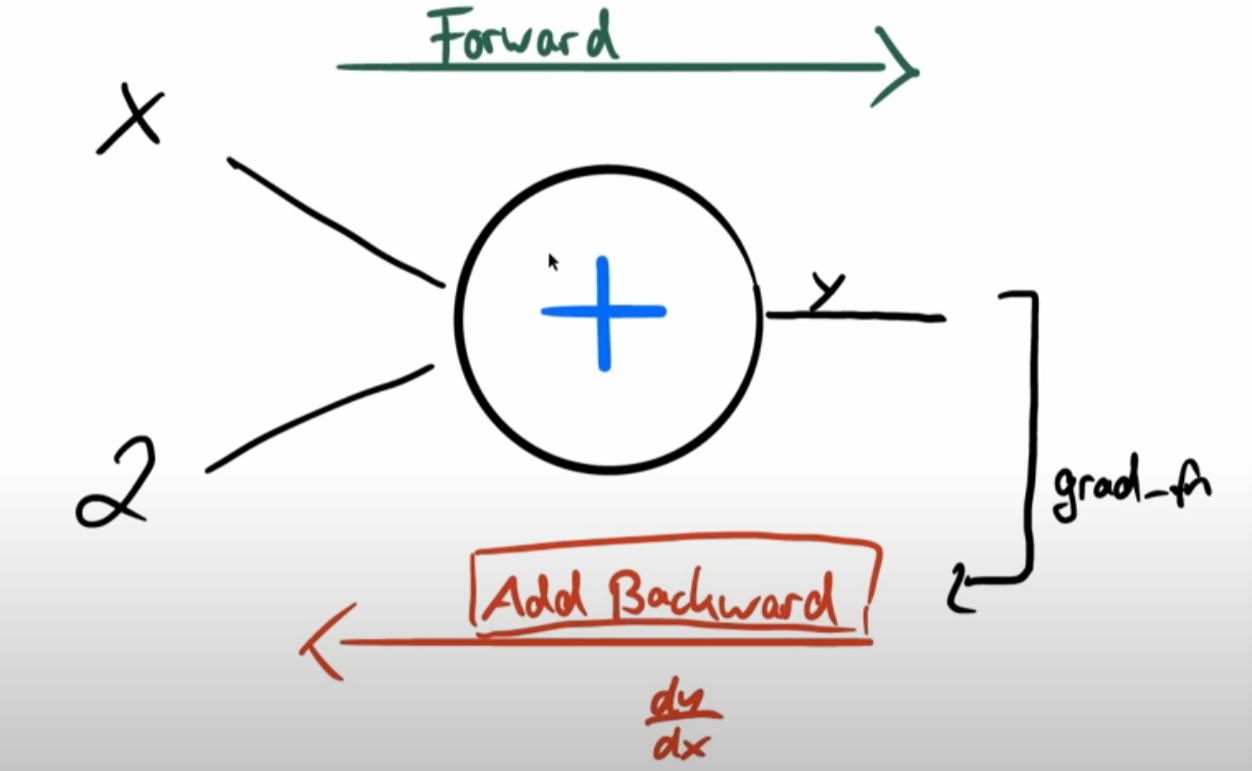

In [13]:
image_path = 'data/grad_2.png'
Image(filename=image_path)

1) Forward pass: we calculate the output $y$ according to the operation (+)
2) PyTorch will automatically create backpropagation function (Add Backward) to get the gradients, 
    so y have an attribute underscore $grad_f_n$. This will point to gradient function. That's 
    why it's called `Add Backward`
3) This function will calculate the gradient of $y$

So, by printing $y$ we will see exactly this $grad_f_n$ attribute

In [14]:
print(y)

tensor([1.9461, 2.1652, 0.0857], grad_fn=<AddBackward0>)


Lets practice with another function

In [20]:
z = y * y * 2
print(z)

tensor([7.5749, 9.3758, 0.0147], grad_fn=<MulBackward0>)


`MulBackward` cause we're multiplying elements

In [21]:
z = z.mean()
print(z)

tensor(5.6552, grad_fn=<MeanBackward0>)


`MeanBackward` has only 1 value cause it calculates the average value

In [22]:
z.backward() # dz/dx
print(x.grad)

tensor([5.1897, 5.7738, 0.2285])
